# Project_9

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from bds_courseware import read_drive_dataset
from bds_courseware import print_dataset_description, print_module_datasets
from bds_courseware import HOMEWORK_DATASETS

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_validate
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [ ]:
import warnings
warnings.filterwarnings("ignore")

==========================================
Bike Sharing Dataset
==========================================

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


=========================================
Background
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

=========================================
Associated tasks
=========================================

	- Regression:
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.

	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days


=========================================
Dataset characteristics
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================

For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)

### Data reading and exploring

In [ ]:
print('Dataset names:', HOMEWORK_DATASETS.keys())
name = 'bike_sharing_hour'
df = read_drive_dataset(*HOMEWORK_DATASETS[name])

Dataset names: dict_keys(['suicide_rates', 'car_perfs', 'brain', 'bank', 'air_quality', 'hypothyroid', 'movies', 'bike_sharing_day', 'bike_sharing_hour', 'quake'])


In [ ]:
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

Now I will investigate the number of values in each column.

In [ ]:
for column in df.columns:
    print('Number of unique values in column -', column, ": ", df[column].nunique())
    if df[column].nunique() < 10:
        print('Unique values in column -', column, ": ", df[column].unique())
    print("------------------------------------------------------------------------------------------------")

Number of unique values in column - instant :  17379
------------------------------------------------------------------------------------------------
Number of unique values in column - dteday :  731
------------------------------------------------------------------------------------------------
Number of unique values in column - season :  4
Unique values in column - season :  [1 2 3 4]
------------------------------------------------------------------------------------------------
Number of unique values in column - yr :  2
Unique values in column - yr :  [0 1]
------------------------------------------------------------------------------------------------
Number of unique values in column - mnth :  12
------------------------------------------------------------------------------------------------
Number of unique values in column - hr :  24
------------------------------------------------------------------------------------------------
Number of unique values in column - holiday :  

In [ ]:
df.shape

(17379, 17)

Dataset has 17379 rows and 17 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


From here I can see that the values are integer, object, float type and that there is null values.

In [ ]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.describe().T

count         mean          std   min        25%        50%  \
instant     17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
season      17379.0     2.501640     1.106918  1.00     2.0000     3.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   
casual      17379.0    35.676218    49.305030  0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286  0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599  1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
season          3.0000      4.0000  
yr              1.0000      1.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
weekday         5.0000      6.0000  
workingday      1.0000      1.0000  
weathersit      2.0000      4.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum             0.7800      1.0000  
windspeed       0.2537      0.8507  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

I don't get any information from the instant column, so I'm going to delete it

In [ ]:
del df["instant"]

### Target column cnt

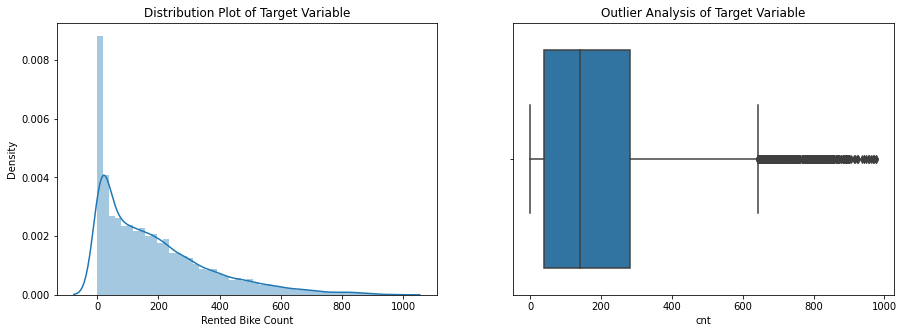

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

# Distribution plot of Rented Bike Count
dist =sns.distplot(df['cnt'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')


# Boxplot
box = sns.boxplot(df.cnt, ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()


As for the target column, I see that it does not have a normal distribution, so I will use log and sqrt and see what is the better option and choose later depending on that.

<AxesSubplot:xlabel='cnt', ylabel='Density'>

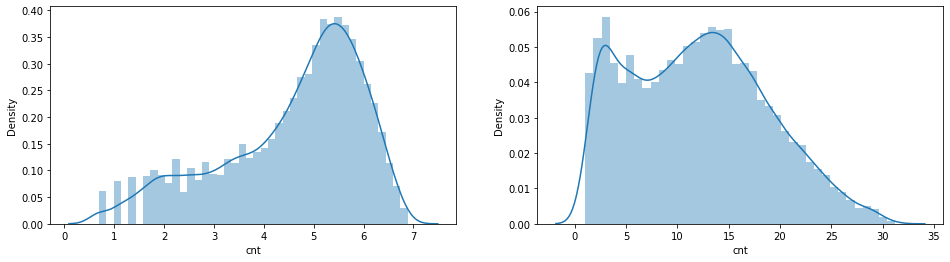

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(16,4))

sns.distplot(np.log1p(df['cnt']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(df['cnt']),kde=True, ax=axs[1])

Since I see that sqrt is the better option, I will choose it.

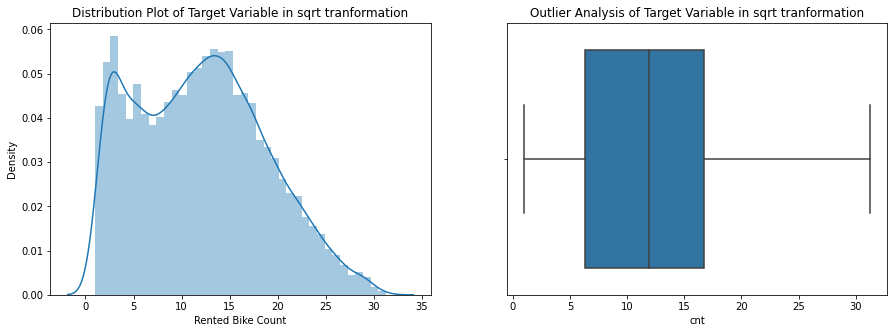

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

#  checking square root tranformation in our target variable
dist =sns.distplot(np.sqrt(df['cnt']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# Boxplot
box = sns.boxplot(np.sqrt(df.cnt), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
plt.show()

## Features extraction and visuelisation

Since I have columns day, year and month, I decide to delete the column "dteday", becouse it does not give me any other information.

In [ ]:
df.drop("dteday", axis=1, inplace=True)

Now I'm going to map the columns to make it easier to read the information from the graph.

In [ ]:
import calendar

df["weekday"] = df.weekday.apply(lambda x : calendar.day_name[x])
df["season"] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df["weathersit"] = df.weathersit.map({1: "Clear weather",\
                                        2 : "Cloudy weather", \
                                        3 : "Medium weather", \
                                        4 : "Heavy weather"})

Now I'm going to create lists of numeric and categorical columns to make it easier to research on them.

In [ ]:
categorical_cols, numerical_cols = [], []

for column in df.columns:
    if df[column].nunique() < 30:
        categorical_cols.append(column)
    else:
        numerical_cols.append(column)

### Categorical columns

In [ ]:
categorical_cols

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit']

In [ ]:
sns.set_palette('RdBu_r')

Now I will make plots for each categorical column depending on the target column "cnt".

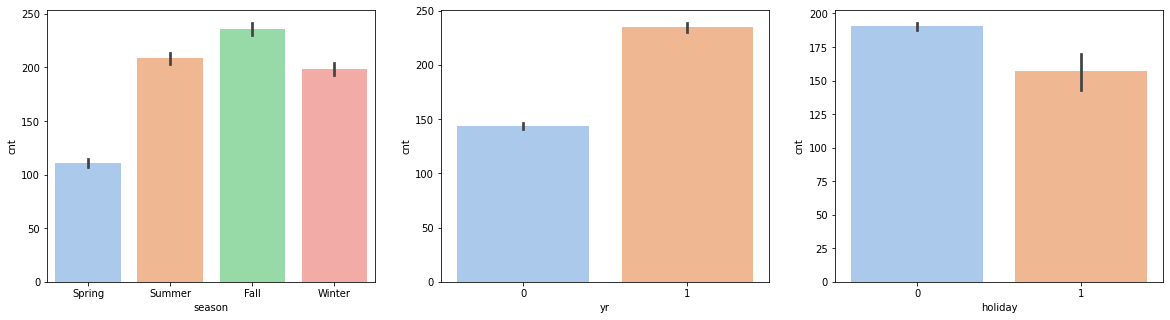

In [ ]:
fig, axes = plt.subplots( figsize=(20,5), ncols=3)
sns.barplot(x='season', y='cnt', data=df, ax=axes[0],palette='pastel')
sns.barplot(x='yr', y='cnt', data=df, ax=axes[1], palette='pastel')
sns.barplot(x='holiday', y='cnt', data=df, ax=axes[2],palette='pastel')
plt.show()

From this I conclude that bicycles are mostly rented in the autumn period of the year, that they were rented more in 2012 and that more are rented when it is not a holiday than when it is.

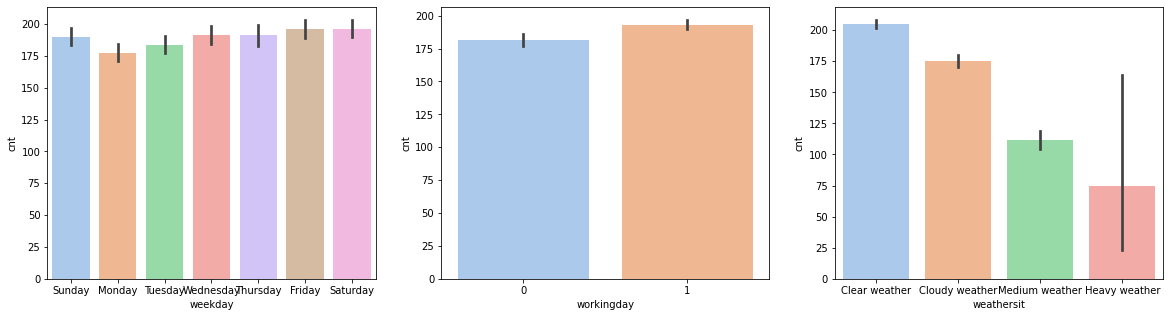

In [ ]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.barplot(x='weekday', y='cnt', data=df, ax=axes[0],palette='pastel')
sns.barplot(x='workingday', y='cnt', data=df, ax=axes[1],palette='pastel')
sns.barplot(x='weathersit', y='cnt', data=df, ax=axes[2],palette='pastel')
plt.show()

From this I can conclude that bicycles are rented almost the same every day, a little more on weekends than on weekdays and that they are rented the most when the weather is clear.

<AxesSubplot:xlabel='cnt', ylabel='weathersit'>

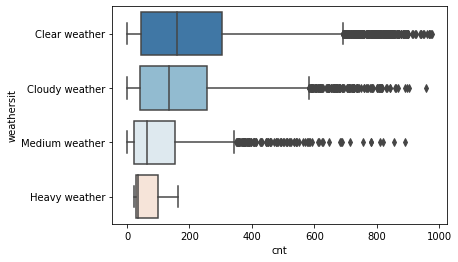

In [ ]:
sns.boxplot(data=df, y="weathersit", x="cnt", orient="h")

In the following graphs, I will show how many bicycles are rented per hour, depending on whether it is a working day or not, goliday or not, which day in week is, what season in year is and what is wheathership.

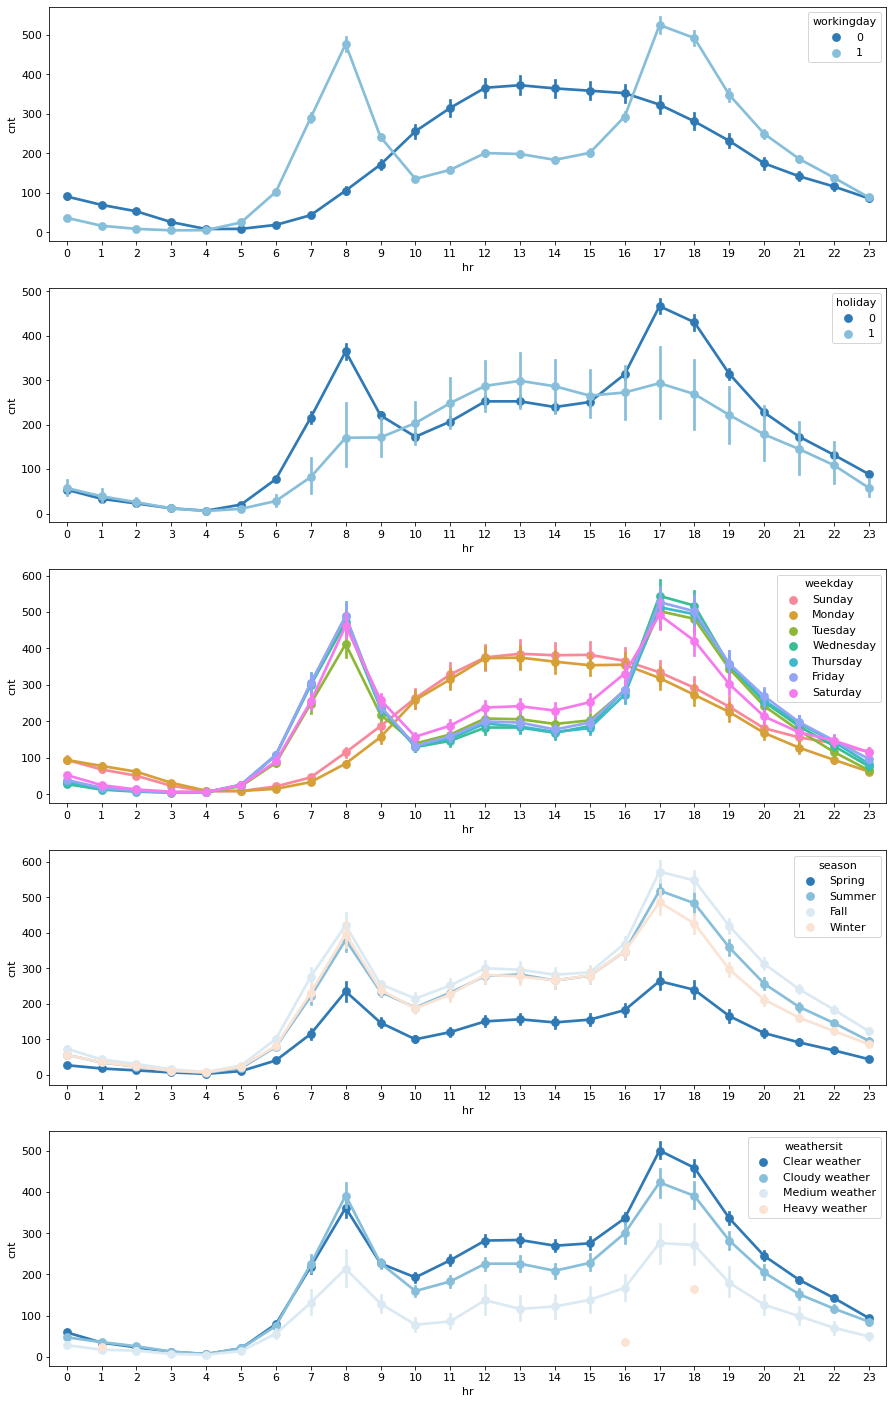

In [ ]:
plt.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(15, 25)

sns.pointplot(x='hr', y='cnt', data=df, hue='workingday', ax=axes[0])
sns.pointplot(x='hr', y='cnt', data=df, hue='holiday', ax=axes[1])
sns.pointplot(x='hr', y='cnt', data=df, hue='weekday', ax=axes[2])
sns.pointplot(x='hr', y='cnt', data=df, hue='season', ax=axes[3])
sns.pointplot(x='hr', y='cnt', data=df, hue='weathersit', ax=axes[4]);

<BarContainer object of 12 artists>

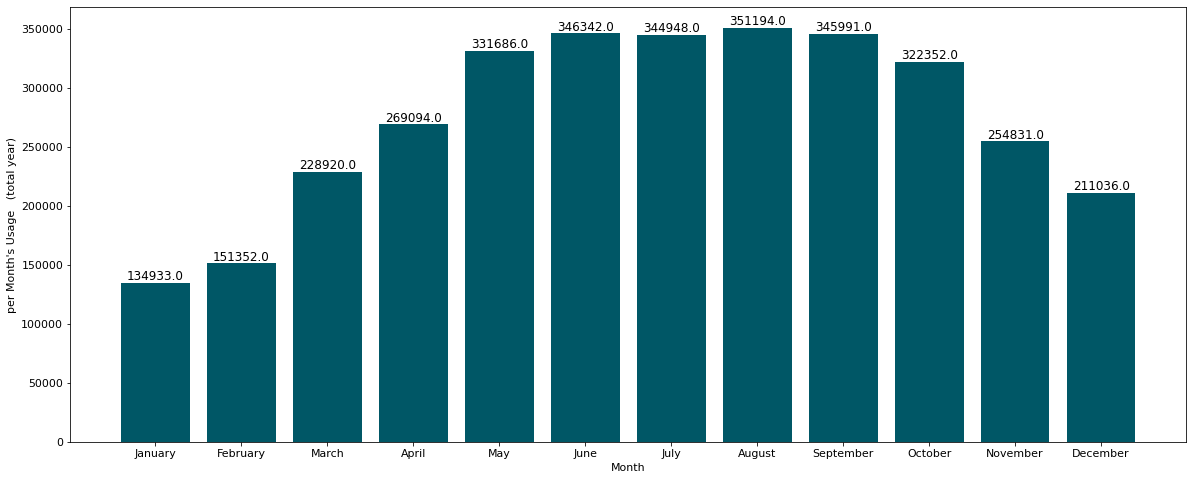

In [ ]:
x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y = []
for i in range(1,13):
    y.append(df[df["mnth"]==i]["cnt"].sum())
plt.figure(figsize=(20,8))
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 1.9, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.title("")
plt.xlabel("Month")
plt.ylabel("per Month's Usage   (total year)")
plt.bar(x,y,color = '#005766')

When comparing monthly demand, it is confirmed that the amount of rents during the winter is the lowest, the amount of rents during the summer period is the highest.

### Numerical features

Now, I will explore the numerical features.

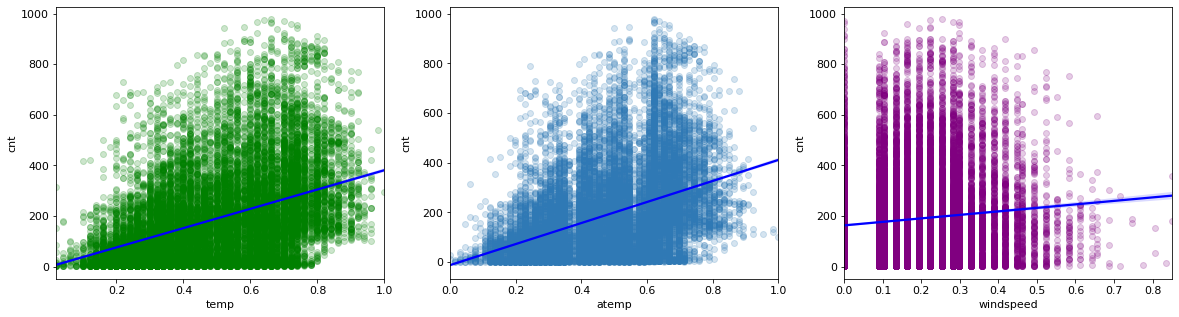

In [ ]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.regplot(x='temp', y='cnt', data=df, scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'},ax=axes[0],color= "g")
sns.regplot(x='atemp', y='cnt', data=df, scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'},ax=axes[1])
sns.regplot(x='windspeed', y='cnt', data=df, scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'}, ax=axes[2],color='purple');
plt.show()

From here I can see that the regplots for temp and atemp are almost the same, so I will use that information later during feature engineering (I will use PCA  for them). Furthermore, I see that as the wind speed increases, the number of rented bicycles decreases.

<AxesSubplot:xlabel='hum', ylabel='Density'>

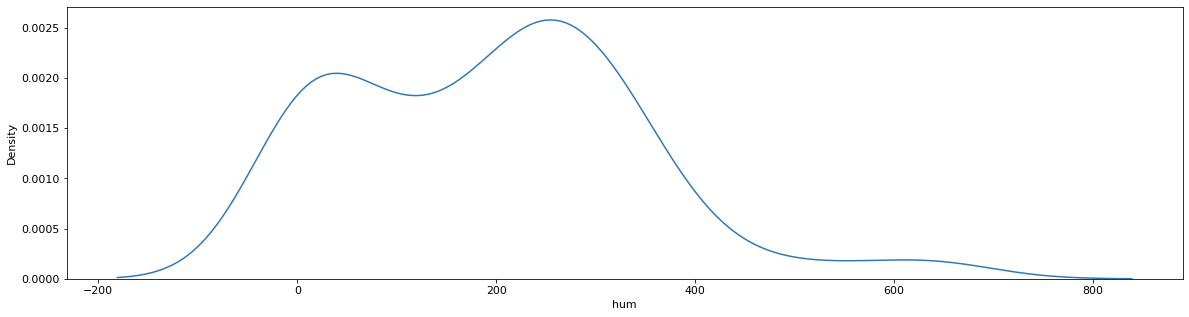

In [ ]:
plt.figure(figsize=(20,5))
sns.kdeplot(df["hum"].value_counts().sort_index())

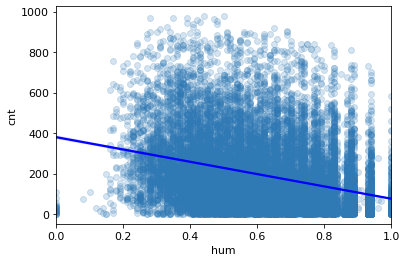

In [ ]:
sns.regplot(x='hum', y='cnt', data=df, scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

Comparing humadity and the number of rented bikes, I see that as the humidity increases, fewer bikes are rented (inversely proportional).

<Figure size 1800x1800 with 0 Axes>

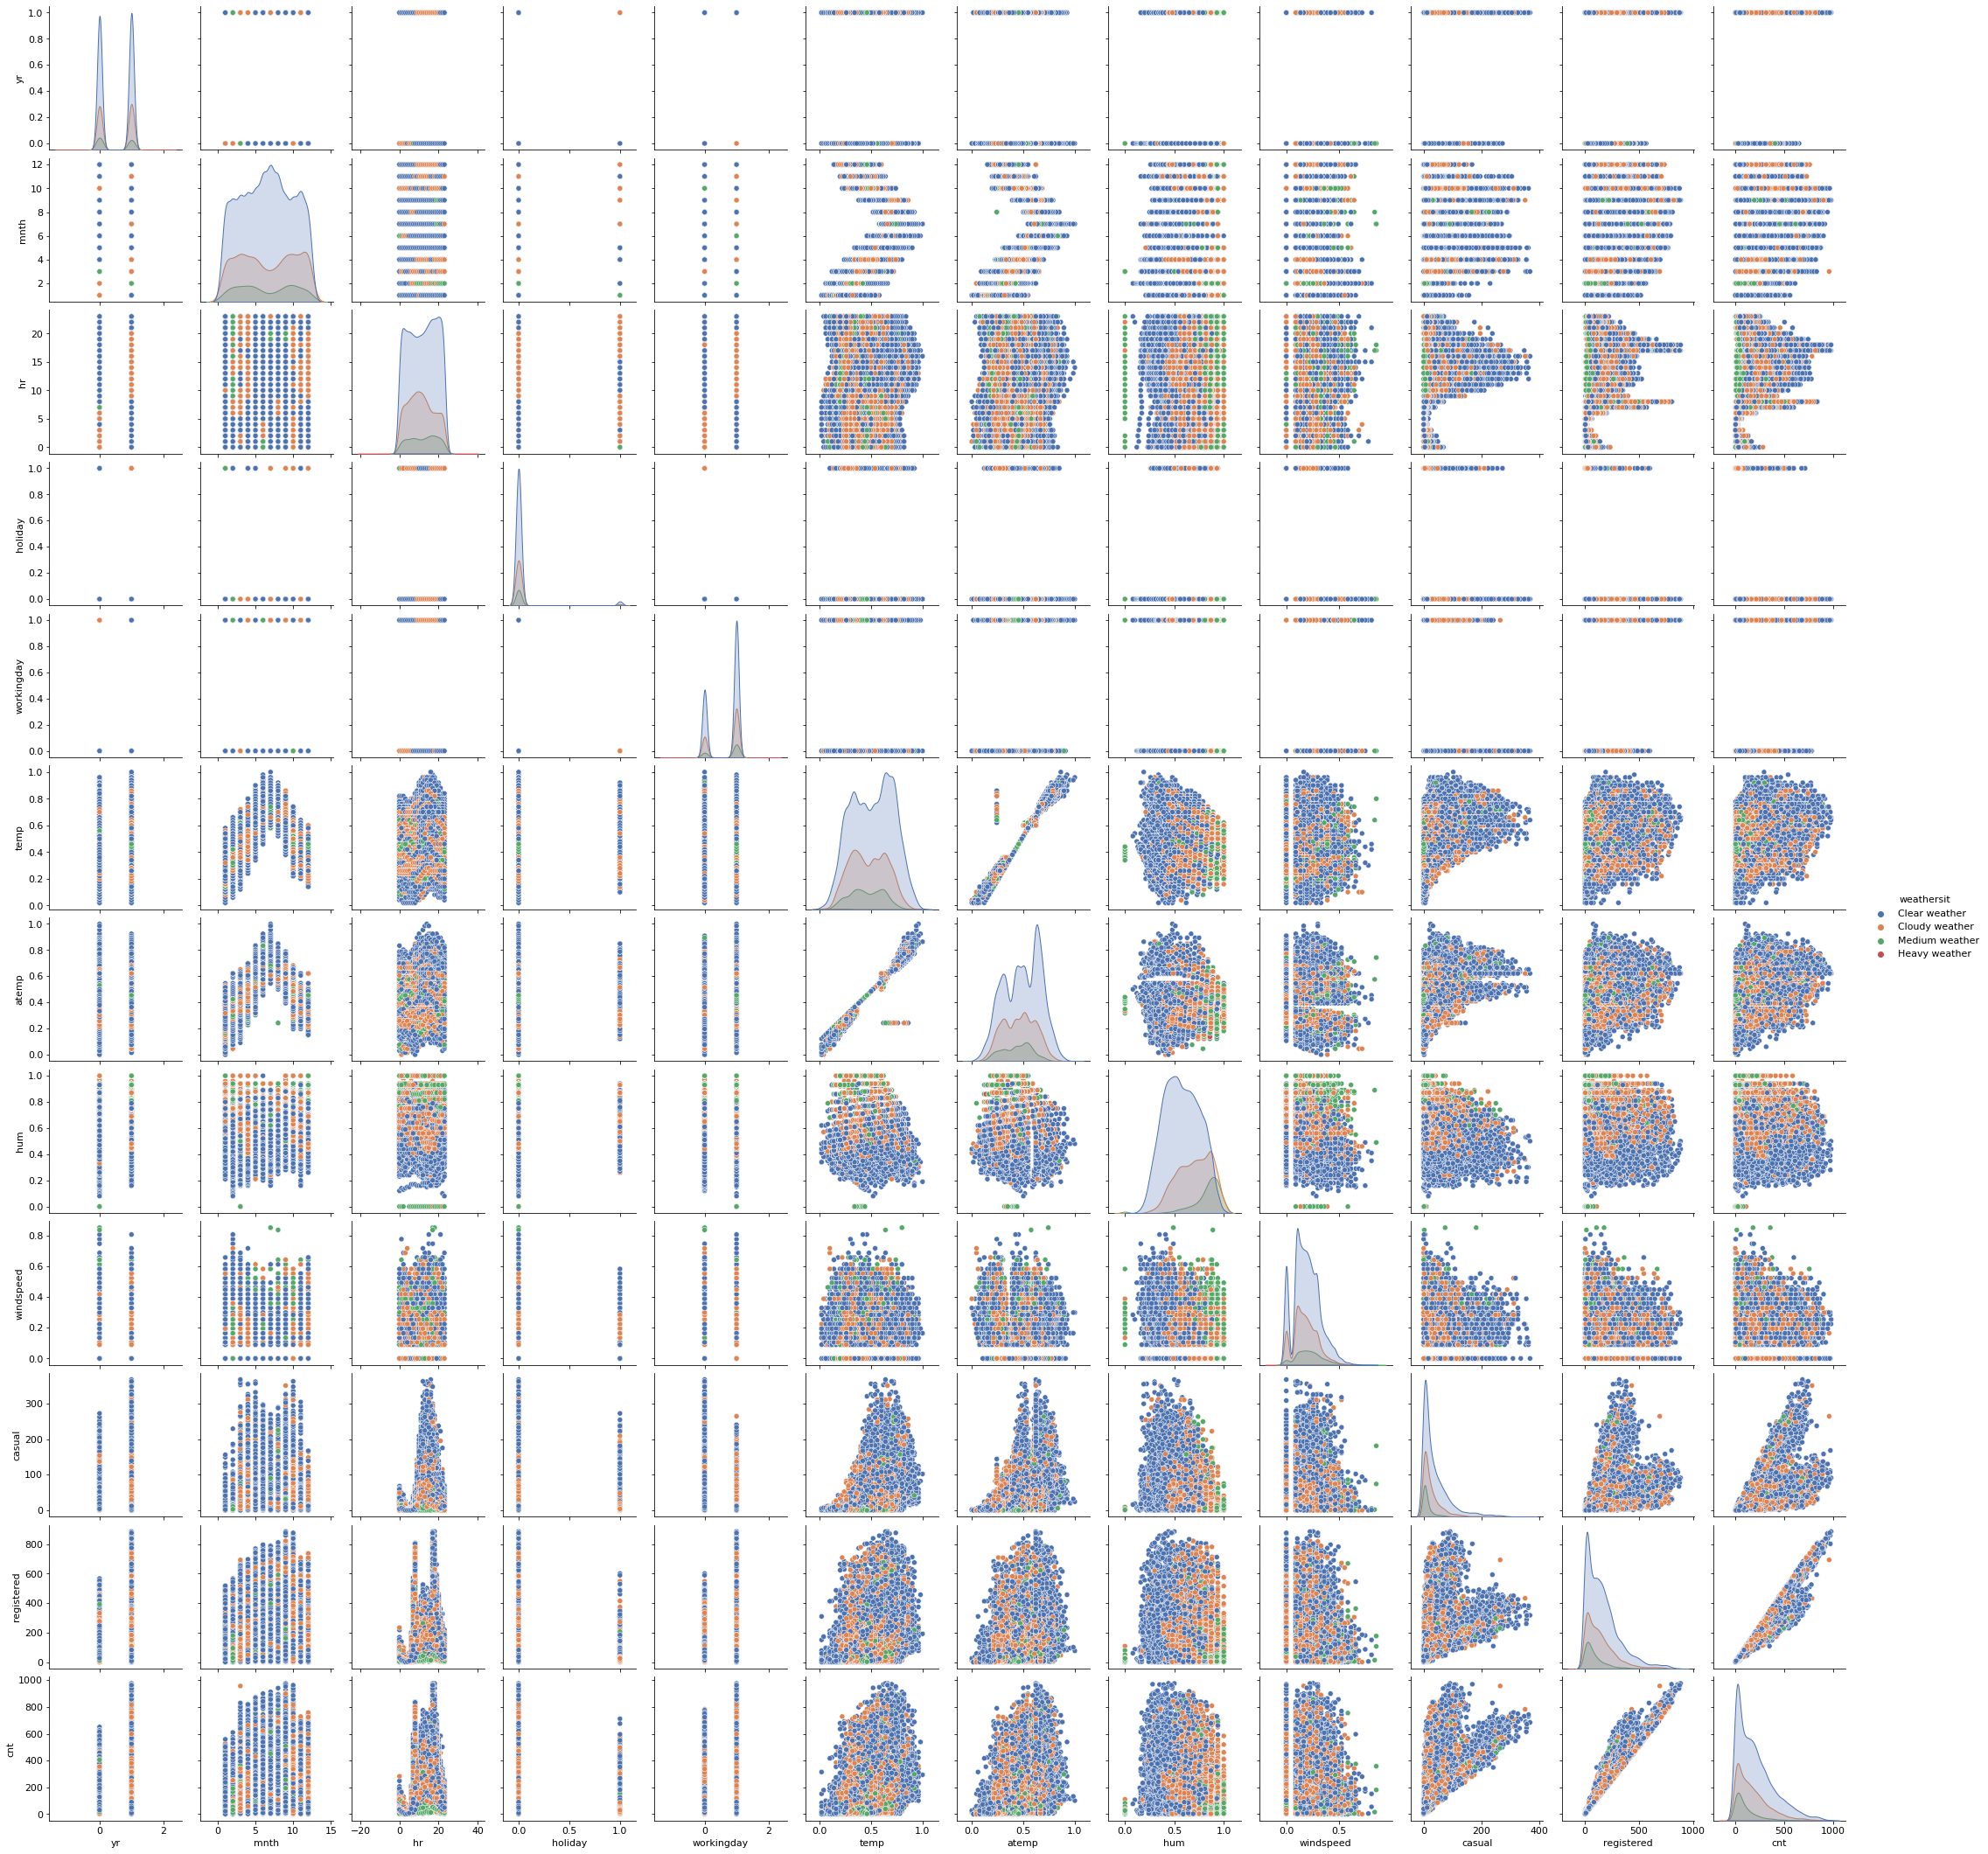

In [ ]:
plt.figure(figsize=(25,25))
sns.pairplot(df, hue="weathersit", palette="deep")
plt.show();

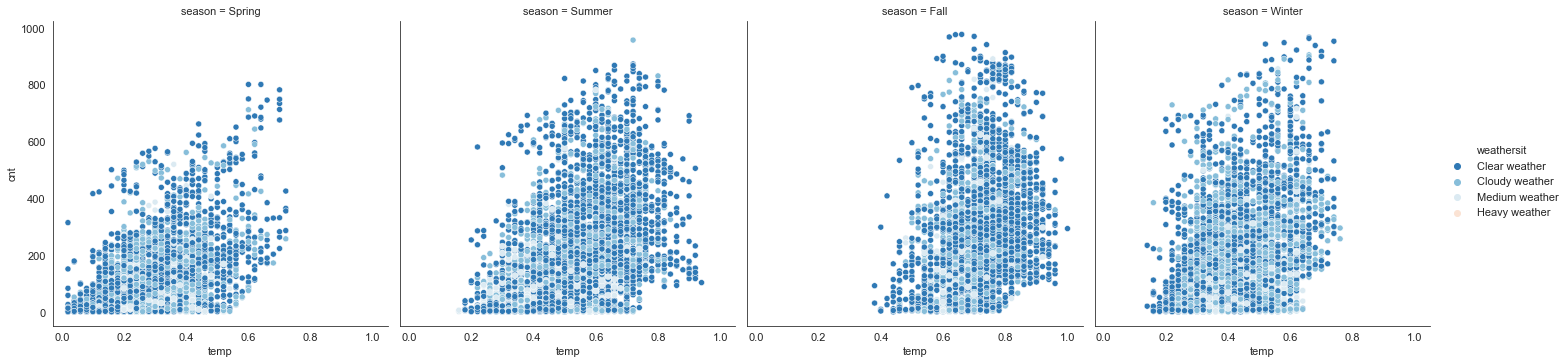

In [ ]:
sns.set_style("white")
sns.relplot(data=df, y="cnt", x="temp", col="season", hue='weathersit');

From here, we can see what the relationship between temperature and the number of rented bike is in each season depending on weathersit. In most cases, it is noticeable that as the temperature rises, the number of rented bikes increase.

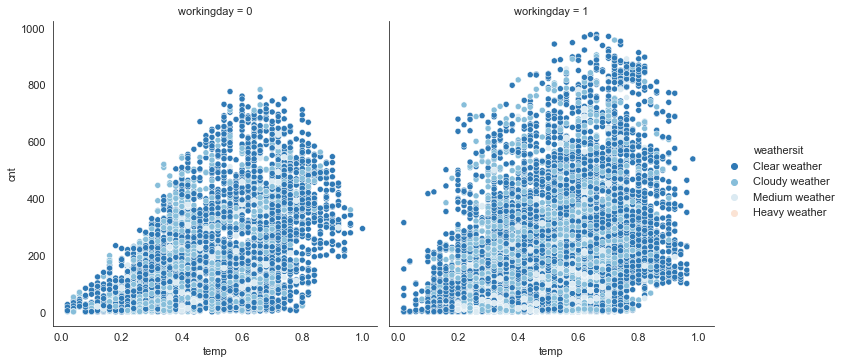

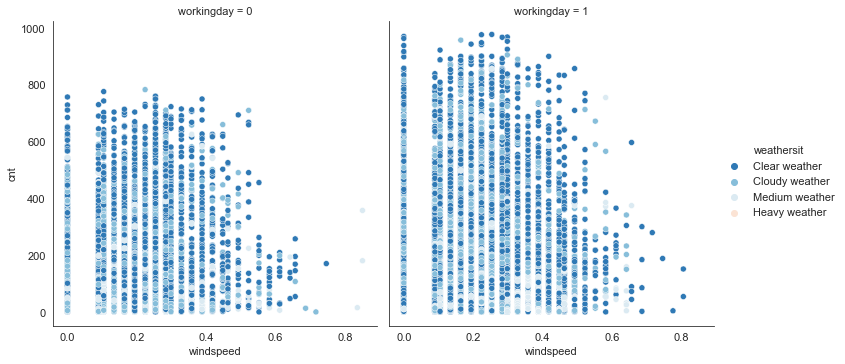

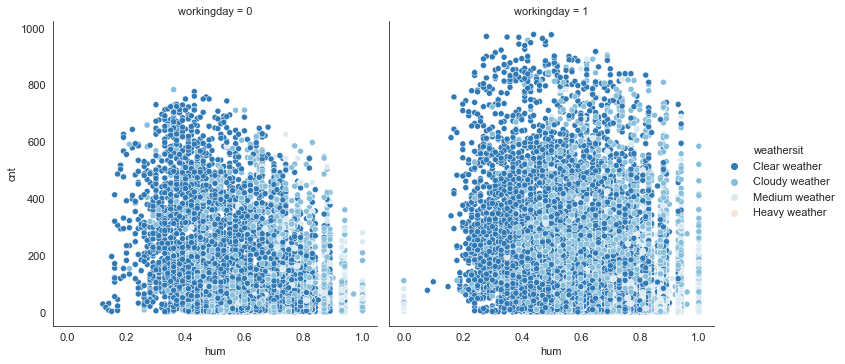

In [ ]:
sns.set_style("white")
sns.relplot(data=df, y="cnt", x="temp", col="workingday", hue='weathersit')
sns.relplot(data=df, y="cnt", x="windspeed", col="workingday", hue='weathersit')
sns.relplot(data=df, y="cnt", x="hum", col="workingday", hue='weathersit');

What I can conclude from here is that as the temperature increases, the number of rented bikes also increases, and as the wind speed decreases, the number of rented bikes increases. All this is more pronounced when the working day =0.

### Outliers detection

Now I will deal with outlier detection. First, I'll plot boxplots and histograms to see which columns have outliers.

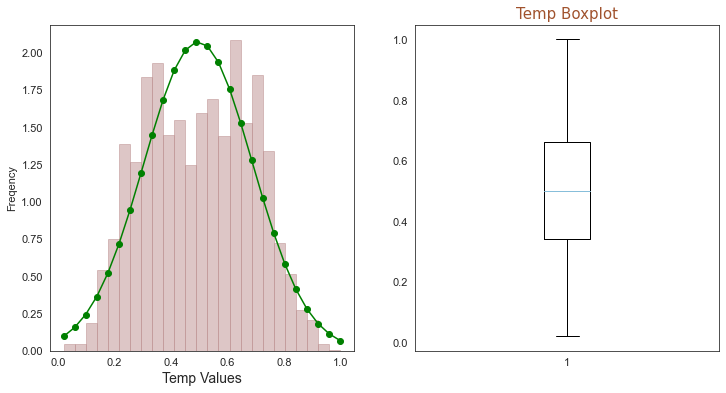

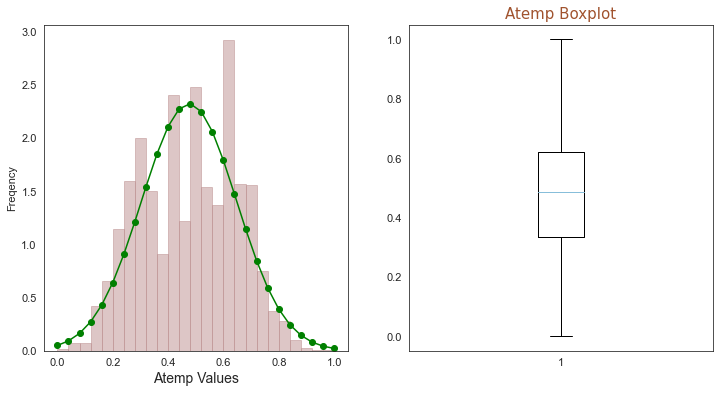

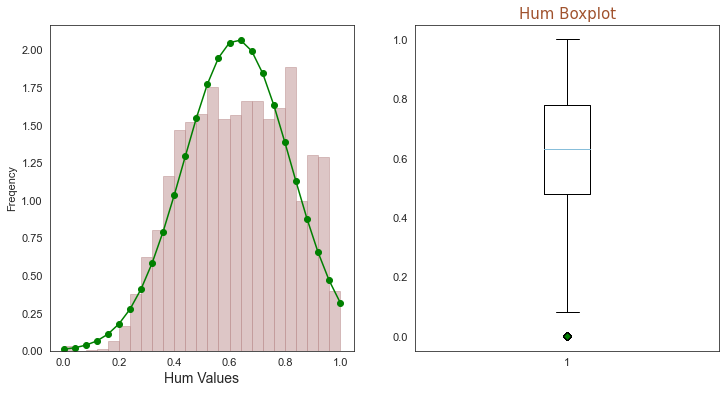

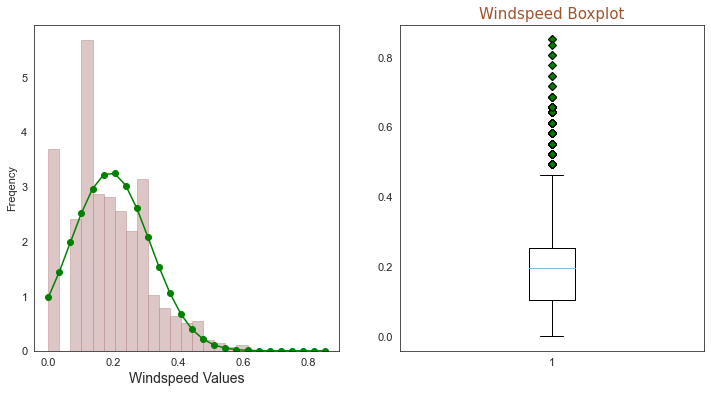

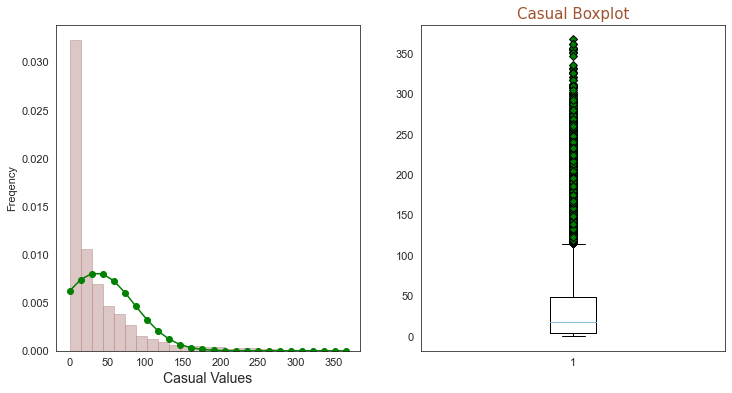

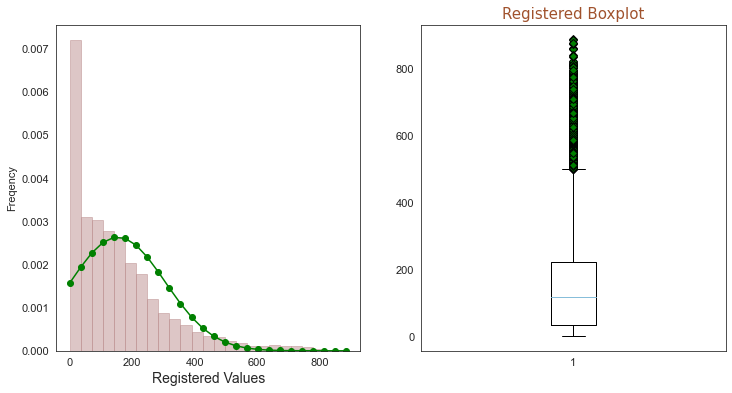

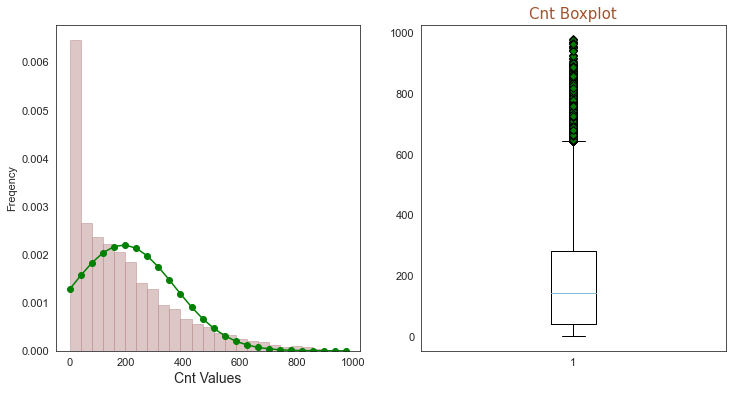

In [ ]:
for column_name in numerical_cols:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Distribution Num. Feature
    _, bins, _ = ax1.hist(df[column_name], bins = 25,
                          density = 1, alpha = 0.5,
                          color = 'rosybrown',
                          ec= 'rosybrown' )

    mu, sigma = stats.norm.fit(df[column_name])
    best_fit_line = stats.norm.pdf(bins, mu, sigma)

    ax1.plot(bins, best_fit_line, 'g-o')

    ax1.set_ylabel('Freqency')
    ax1.set_xlabel(column_name.capitalize() + " Values",fontsize=14)

    # Boxplot
    green_diamond = dict(markerfacecolor='g', marker='D')
    ax2.boxplot(df[column_name],flierprops=green_diamond)

    ax2.set_title(column_name.capitalize() + " Boxplot",
                  fontdict=dict(
                  family="DejaVu Sans",
                  size=15,
                  color="sienna"))
    plt.show()

From here I can conclude that the columns humidity, windspeed, casual and registered have misiisng values and I decided to clean them using the following method (also, the target column in this form has outliers (I haven't implemented sqrt yet - explained at the beginning of work), so I won't modificate the target column):

In [ ]:
def outliers_modification(data, column):
    for i in range(len(data)):
        if data[column][i] > np.percentile(data[column].unique(), 95):
            data[column][i] = np.percentile(data[column].unique(), 95)
    return data

In [ ]:
for column in ["hum", "windspeed",'casual','registered']:
    df = outliers_modification(df, column)

### Feature engeenering

Now I will make a correlation matrix on the features so far.

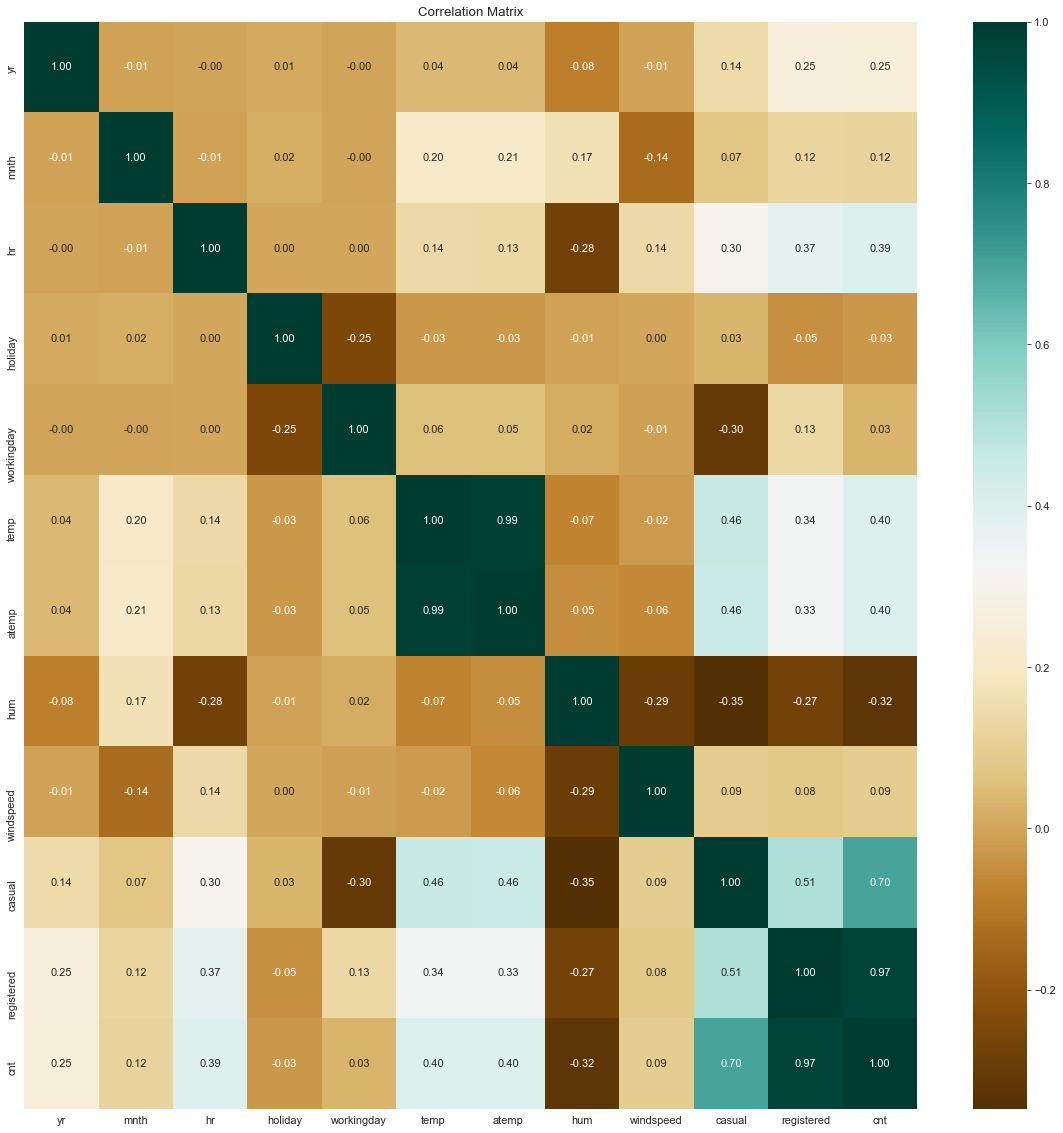

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr()

# Set up figure size
fig, ax = plt.subplots(figsize=(20, 20))

# Set up heatmap using Seaborn
sns.heatmap(corr, cmap='BrBG', annot=True, fmt='.2f', ax=ax)

# Set plot title
plt.title('Correlation Matrix')

# Display plot
plt.show()

From here I can see that the temp and atemp columns are highly correlated, and also the same with the target column, so I decided to apply the PCA method on them. After it, i will drop columns temp and atemp.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
df['temperature'] = pca.fit_transform(df[['temp','atemp']])

In [ ]:
df.drop('temp', axis=1, inplace=True)
df.drop('atemp', axis=1, inplace=True)

In [ ]:
def vif(X):

    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns

    return vif

In [ ]:
vif(df[[i for i in df.describe().columns if i not in ["casual", "registered", "cnt"]]])

VIF Factor     features
0    1.898474           yr
1    4.643047         mnth
2    3.365881           hr
3    1.090736      holiday
4    3.124834   workingday
5    6.301455          hum
6    2.971201    windspeed
7    1.071766  temperature

Since the VIF factor of any is not too large I wont remove any column. In the following, I will make dummy columns from categorical columns.

In [ ]:
df = pd.get_dummies(df, columns=['weathersit', 'season', 'mnth', 'weekday'])
df.head()

yr  hr  holiday  workingday   hum  windspeed  casual  registered  cnt  \
0   0   0        0           0  0.81        0.0     3.0        13.0   16   
1   0   1        0           0  0.80        0.0     8.0        32.0   40   
2   0   2        0           0  0.80        0.0     5.0        27.0   32   
3   0   3        0           0  0.75        0.0     3.0        10.0   13   
4   0   4        0           0  0.75        0.0     0.0         1.0    1   

   temperature  ...  mnth_10  mnth_11  mnth_12  weekday_Friday  \
0    -0.316853  ...        0        0        0               0   
1    -0.341897  ...        0        0        0               0   
2    -0.341897  ...        0        0        0               0   
3    -0.316853  ...        0        0        0               0   
4    -0.316853  ...        0        0        0               0   

   weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
0               0                 0               1                 0   
1               0                 0               1                 0   
2               0                 0               1                 0   
3               0                 0               1                 0   
4               0                 0               1                 0   

   weekday_Tuesday  weekday_Wednesday  
0                0                  0  
1                0                  0  
2                0                  0  
3                0                  0  
4                0                  0  

[5 rows x 37 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         17379 non-null  int64  
 1   hr                         17379 non-null  int64  
 2   holiday                    17379 non-null  int64  
 3   workingday                 17379 non-null  int64  
 4   hum                        17379 non-null  float64
 5   windspeed                  17379 non-null  float64
 6   casual                     17379 non-null  float64
 7   registered                 17379 non-null  float64
 8   cnt                        17379 non-null  int64  
 9   temperature                17379 non-null  float64
 10  weathersit_Clear weather   17379 non-null  uint8  
 11  weathersit_Cloudy weather  17379 non-null  uint8  
 12  weathersit_Heavy weather   17379 non-null  uint8  
 13  weathersit_Medium weather  17379 non-null  uin

### Splitting and scaling

Splitting data and using Standard Scaler. I apply the sqrt to the target column (which I wrote about before).

In [ ]:
whole_df = df

I am deleting the columns casual and registered because the target column cnt is formed from them.

In [ ]:
df=df.drop(columns=['casual','registered'])

Splitting data and using Standard Scaler. I apply the sqrt to the target column (which I wrote about before).

In [ ]:
X = df.drop('cnt', axis=1)
y= np.sqrt(df['cnt'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)

print(X_train.shape)
print(X_test.shape)

(15641, 34)
(1738, 34)


## Modeling

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model_result = []

In [ ]:
def predict(ml_model, model_name, X_train, y_train, X_test, y_test, model_result):

    # model fitting
    model = ml_model.fit(X_train, y_train)

    # predicting values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

  # Reverse the transformation on the predictions    (In case if we need y_train_pred in original and transformed way)
    y_train_pred_original = np.power(y_train_pred, 2)
    y_test_pred_original = np.power(y_test_pred, 2)

    # graph --> best fit line on test data
    sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'green'})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    '''Evaluation metrics on train data'''
    train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
    print(f'train MAE : {train_MAE}')
    print('-'*15)

    '''Evaluation metrics on test data'''
    test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
    print(f'test MAE : {test_MAE}')
    print('-'*15)

    # graph --> actual vs predicted on test data
    plt.figure(figsize=(6,5))
    plt.plot((y_test_pred)[:20])
    plt.plot(np.array((y_test)[:20]))
    plt.legend(["Predicted","Actual"])
    plt.xlabel('Test Data on last 20 points')
    plt.show()
    print('-'*25)

    '''actual vs predicted value on test data'''
    d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
    print(pd.DataFrame(data=d).head().T)
    print('-'*25)

    # using the score from the performance metrics to create the final model_result.
    model_result.append({'model':model_name,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE})
    return y_test_pred

I will use different models, I will not use hyperparameter tuning on models that are not on the homework list.

### Ridge model

In [ ]:
ridge_model = Ridge(alpha=0.1, max_iter=1000)

train MAE : 3.773
---------------
test MAE : 3.81
---------------


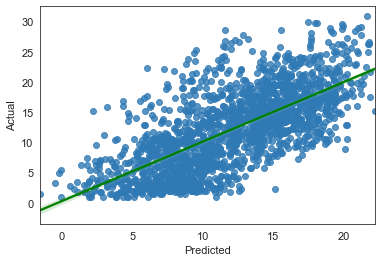

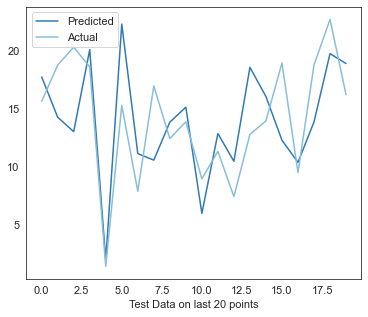

-------------------------
               11215      12940      11502      13018     117  
y_actual   15.620499  18.734994  20.273135  18.574176  1.414214
y_predict  17.714188  14.246347  13.004759  20.062634  1.958859
error      -2.093688   4.488647   7.268376  -1.488459 -0.544645
-------------------------


array([17.71418759, 14.24634706, 13.00475865, ...,  9.17896069,
        7.97439567, 16.72997139])

In [ ]:
predict(ridge_model, 'Ridge', X_train, y_train, X_test, y_test, model_result)

### KNN Regressor model

KNN Regressor model with hyperparameters tuning.

In [ ]:
def grid_search(model, grid):
    gs=GridSearchCV(model, grid, cv=5, scoring="neg_mean_squared_error")
    gs.fit(X_train, y_train)
    return gs

In [ ]:
def print_gs_eval(gs):
    # best score achieved during the GridSearchCV
    print('GridSearch CV best score: {:.4f}\n'.format(gs.best_score_))

    # print parameters that give the best results
    print('Parameters that give the best results:', (gs.best_params_))

    # print estimator that was chosen by the GridSearch
    print('\nEstimator that was chosen by the search:', (gs.best_estimator_))

In [ ]:
grid={"leaf_size" : [1,2,3,4,5,6,7,8,9,10,11,12,13],
      "n_neighbors": [1,2,3,4,5,6,7,8,9,10]}
model=KNeighborsRegressor()
gs=grid_search(model, grid)

In [ ]:
print_gs_eval(gs)

GridSearch CV best score: -17.3704

Parameters that give the best results: {'leaf_size': 1, 'n_neighbors': 2}

Estimator that was chosen by the search: KNeighborsRegressor(leaf_size=1, n_neighbors=2)


In [ ]:
gs.best_params_

{'leaf_size': 1, 'n_neighbors': 2}

In [ ]:
knn_model = KNeighborsRegressor(**gs.best_params_)

train MAE : 1.471
---------------
test MAE : 2.811
---------------


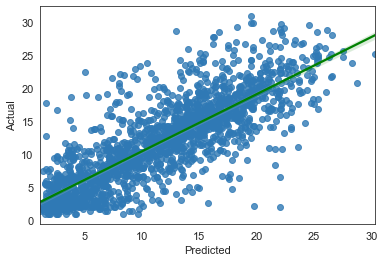

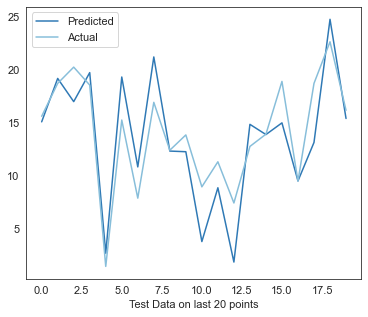

-------------------------
               11215      12940      11502      13018     117  
y_actual   15.620499  18.734994  20.273135  18.574176  1.414214
y_predict  15.095272  19.202072  17.007475  19.754615  2.658312
error       0.525227  -0.467078   3.265660  -1.180440 -1.244099
-------------------------


array([15.09527235, 19.20207233, 17.00747487, ..., 16.56475785,
       18.66278145, 15.51469318])

In [ ]:
predict(knn_model, 'KNN', X_train, y_train, X_test, y_test, model_result)

### SVM model

SVR model with hyperparameters tuning.

In [ ]:
grid={'C': [10, 100, 1000],
      'kernel': ['rbf','linear']}

model=SVR()
gs=grid_search(model, grid)

In [ ]:
print_gs_eval(gs)

GridSearch CV best score: -14.4175

Parameters that give the best results: {'C': 100, 'kernel': 'rbf'}

Estimator that was chosen by the search: SVR(C=100)


In [ ]:
gs.best_params_

{'C': 100, 'kernel': 'rbf'}

In [ ]:
svm_model = SVR(**gs.best_params_)

train MAE : 2.138
---------------
test MAE : 2.699
---------------


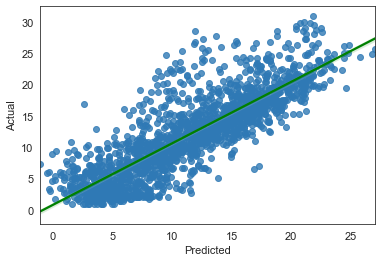

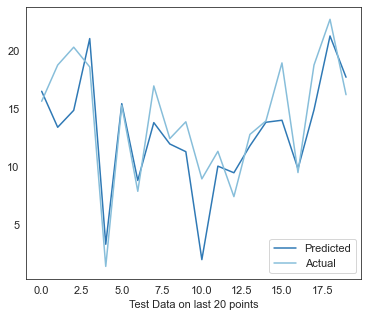

-------------------------
               11215      12940      11502      13018     117  
y_actual   15.620499  18.734994  20.273135  18.574176  1.414214
y_predict  16.479972  13.382578  14.839602  21.014042  3.319593
error      -0.859473   5.352416   5.433533  -2.439866 -1.905380
-------------------------


array([16.47997243, 13.3825784 , 14.83960194, ...,  9.12047532,
       10.10837436, 13.45563637])

In [ ]:
# predict(SVR(**gs.best_params_), 'SVM')
predict(svm_model, 'SVM', X_train, y_train, X_test, y_test, model_result)

### Decision Tree

Decision Tree Regressor model with hyperparameters tuning.

In [ ]:
grid={"max_depth" : [15,20,25],
      "min_samples_leaf":[5,10,15,20,25],
      "max_features":["auto","log2","sqrt"],
      "max_leaf_nodes":[30,40,50,60] }


model=DecisionTreeRegressor()
gs=grid_search(model, grid)

In [ ]:
print_gs_eval(gs)

GridSearch CV best score: -6.6214

Parameters that give the best results: {'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': 60, 'min_samples_leaf': 25}

Estimator that was chosen by the search: DecisionTreeRegressor(max_depth=15, max_features='auto', max_leaf_nodes=60,
                      min_samples_leaf=25)


In [ ]:
gs.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 60,
 'min_samples_leaf': 25}

In [ ]:
dtr_model = DecisionTreeRegressor(**gs.best_params_)

train MAE : 1.845
---------------
test MAE : 1.844
---------------


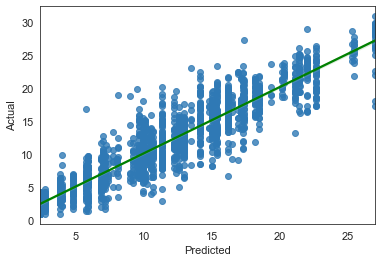

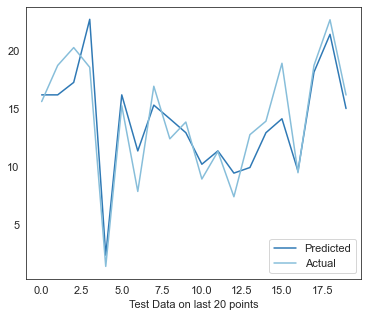

-------------------------
               11215      12940      11502      13018     117  
y_actual   15.620499  18.734994  20.273135  18.574176  1.414214
y_predict  16.197435  16.197435  17.272307  22.709641  2.378921
error      -0.576936   2.537559   3.000828  -4.135465 -0.964707
-------------------------


array([16.19743518, 16.19743518, 17.27230728, ..., 15.39809611,
       14.13875197, 14.13875197])

In [ ]:
predict(dtr_model, 'Decision Tree', X_train, y_train, X_test, y_test, model_result)

### Random Forest model

Random Forest Regressor model with hyperparameters tuning.

In [ ]:
grid = {'n_estimators': [50,80],
        'max_depth': [15,20],
        'min_samples_split': [5,15],
        'min_samples_leaf': [3,5]}


# Initialize the RandomForestRegressor model
model=RandomForestRegressor()
gs=grid_search(model, grid)

In [ ]:
print_gs_eval(gs)

GridSearch CV best score: -2.2510

Parameters that give the best results: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 80}

Estimator that was chosen by the search: RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=80)


In [ ]:
gs.best_params_

{'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 80}

In [ ]:
rf_model = RandomForestRegressor(**gs.best_params_)

train MAE : 0.617
---------------
test MAE : 0.967
---------------


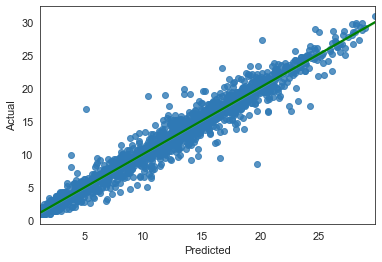

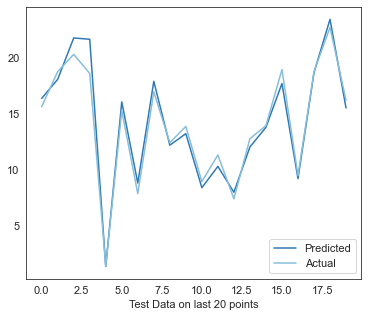

-------------------------
               11215      12940      11502      13018     117  
y_actual   15.620499  18.734994  20.273135  18.574176  1.414214
y_predict  16.354494  18.049760  21.731303  21.617761  1.397564
error      -0.733995   0.685234  -1.458168  -3.043586  0.016649
-------------------------


array([16.35449398, 18.04976011, 21.73130341, ..., 16.81945453,
       18.94271544, 18.35775014])

In [ ]:
predict(rf_model, 'Random Forest', X_train, y_train, X_test, y_test, model_result)

### AdaBoost

AdaBoost Regressor with hyperparameters tuning.

In [ ]:
grid = {'n_estimators':[10, 50, 100, 500],
'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
}
model=AdaBoostRegressor()
gs=grid_search(model, grid)

In [ ]:
print_gs_eval(gs)

GridSearch CV best score: -10.8936

Parameters that give the best results: {'learning_rate': 1.0, 'n_estimators': 100}

Estimator that was chosen by the search: AdaBoostRegressor(n_estimators=100)


In [ ]:
gs.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [ ]:
dt = DecisionTreeRegressor(max_depth=12)

In [ ]:
ada_model = AdaBoostRegressor(base_estimator=dt,**gs.best_params_)

train MAE : 0.528
---------------
test MAE : 0.967
---------------


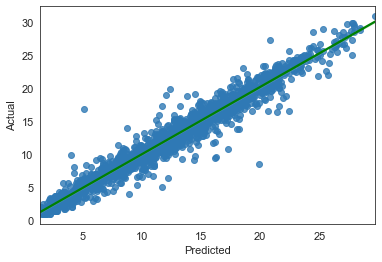

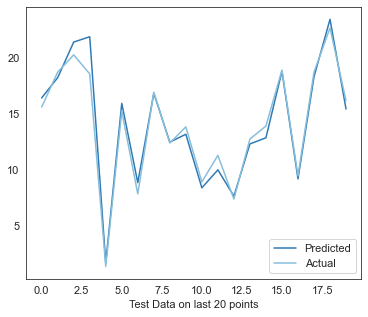

-------------------------
               11215      12940      11502      13018     117  
y_actual   15.620499  18.734994  20.273135  18.574176  1.414214
y_predict  16.437034  18.241645  21.413330  21.888868  1.732051
error      -0.816535   0.493349  -1.140195  -3.314692 -0.317837
-------------------------


array([16.43703426, 18.24164546, 21.41333038, ..., 16.95674883,
       20.23307129, 16.33769027])

In [ ]:
predict(ada_model, 'AdaBoost', X_train, y_train, X_test, y_test, model_result)

### Interpretation of model results

In [ ]:
model_result = pd.DataFrame(model_result)
model_result = model_result.sort_values(by='test MAE', ascending=False)

In [ ]:
model_result

model  train MAE  test MAE
0          Ridge      3.773     3.810
1            KNN      1.471     2.811
2            SVM      2.138     2.699
3  Decision Tree      1.845     1.844
4  Random Forest      0.617     0.967
5       AdaBoost      0.528     0.967

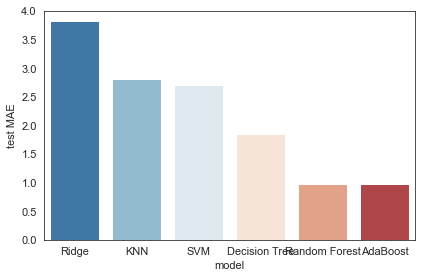

In [ ]:
# plotting graph to compare model performance of all the models
sns.barplot(x=model_result['model'], y=model_result['test MAE'])
plt.tight_layout()
plt.show()

From here I can conclude that the best model is Random Forest by having the smallest MAE, so I will use it in further work.

## Model selection

I choose the best model dynamically, in case there is a change in the evaluation in a future experiment.

In [ ]:
if model_result["model"][model_result['test MAE'].idxmin()] == "Random Forest":
    best_model = rf_model
if model_result["model"][model_result['test MAE'].idxmin()] == "AdaBoost":
    best_model = ada_model
if model_result["model"][model_result['test MAE'].idxmin()] == "Decision Tree":
    best_model = dtr_model
if model_result["model"][model_result['test MAE'].idxmin()] == "Ridge":
    best_model = ridge_model
if model_result["model"][model_result['test MAE'].idxmin()] == "KNN":
    best_model = knn_model
if model_result["model"][model_result['test MAE'].idxmin()] == "SVM":
    best_model = svm_model

In [ ]:
best_model

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=80)

Now I will check the importance of features for the selected best model.

In [ ]:
# feature importance
importances = best_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = list(sorting_features[sorting_features["Feature Importance"] > 0]["Feature"])

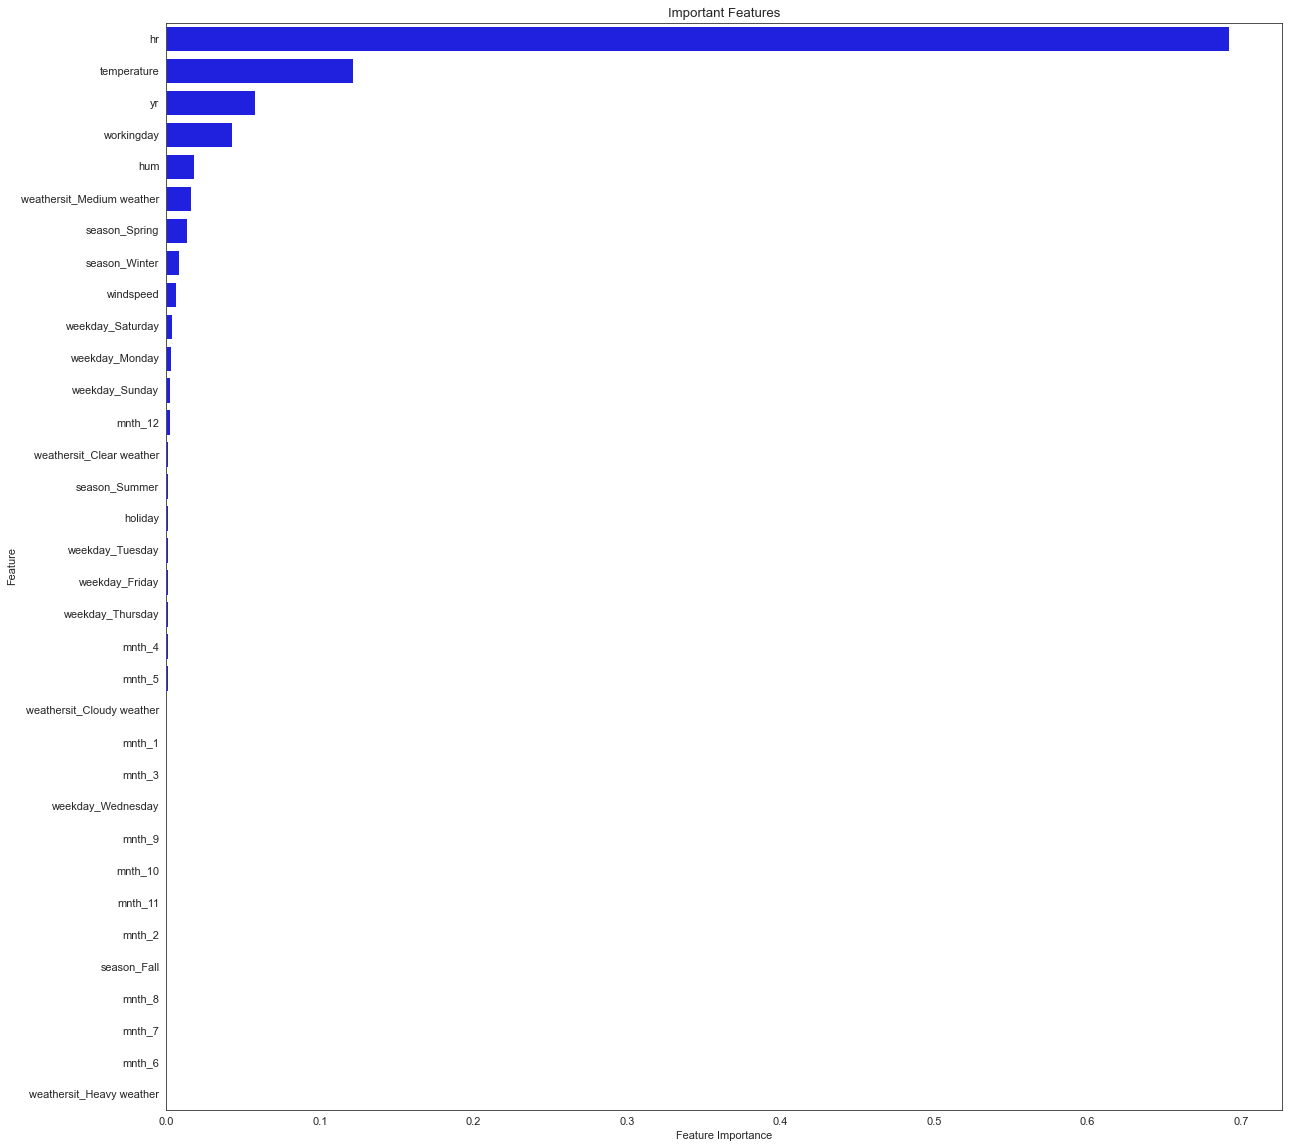

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(20,20))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

From here I can see that the most important features. The most influental features are hr, temperature, yr, working day.

Those with importance <= 0 are removed from the list of features.

I can see that feature `hr` stands out as particularly significant in my case (among other things, it is more important than the `season` feature - one possible reason why the "hr" feature may be more important than the "season" feature in predicting bike rentals is that there may be more hourly variations in bike rentals compared to seasonal variations. For example, there may be different rental patterns during rush hour versus mid-day or evening hours, and these patterns may be consistent across all seasons.).

In [ ]:
columns = [i for i in features if i not in ["cnt", "casual", "registered"]]

According to the definition of the task, I divide the data set into train and test (validation) by using the first year of data for train and the second year of data for validation. `Cnt` is target in this case.

In [ ]:
X_train_new = df[df["yr"] == 0][columns]
X_test_new = df[df["yr"] == 1][columns]
y_train_new = df[df["yr"] == 0]["cnt"]
y_test_new = df[df["yr"] == 1]["cnt"]

train MAE : 13.431
---------------
test MAE : 88.505
---------------


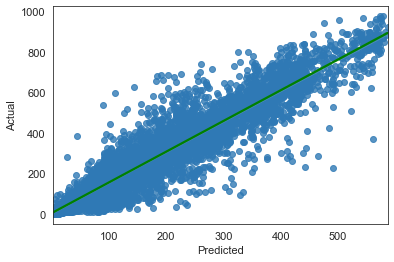

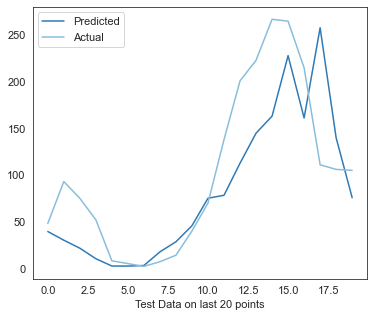

-------------------------
                8645       8646      8647       8648     8649
y_actual   48.000000  93.000000  75.00000  52.000000  8.00000
y_predict  39.414277  30.084912  21.52402  10.243914  2.41587
error       8.585723  62.915088  53.47598  41.756086  5.58413
-------------------------


In [ ]:
cnt_pred = predict(best_model, 'Best model', X_train_new, y_train_new, X_test_new, y_test_new, [])

From here I see that now the results are worse, there is a significant increase in MAE (from ~1 to ~89). I suspect that the fact that the best model (the model currently in use) was obtained by fitting on other data had an effect. Also, during model selection, the model was trained on a significantly larger amount of data (90%), and now it is trained for 1 year, which is significantly less than 90%. Also, if I use the same hyperparameters in the validation set, I may be in danger of overfitting the model with that specific data (the error on the training set is ~13.5 and on the test set is ~88.5).

### Multitarget

According to the definition of the task, I divide the data set into train and test (validation) by using the first year of data for train and the second year of data for validation. `casual` and `registered` are targets in this case.

In [ ]:
X_train_new_1 = whole_df[whole_df["yr"] == 0][[i for i in features if i not in ["cnt", "casual", "registered"]]]
X_test_new_1 = whole_df[whole_df["yr"] == 1][[i for i in features if i not in ["cnt", "casual", "registered"]]]
y_train_new_1 = whole_df[whole_df["yr"] == 0][["casual", "registered"]]
y_test_new_1 = whole_df[whole_df["yr"] == 1][["casual", "registered"]]

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
clf = MultiOutputRegressor(best_model)
clf = clf.fit(X_train_new_1, y_train_new_1)

In [ ]:
y_pred = clf.predict(X_test_new_1)

In [ ]:
from sklearn.metrics import mean_squared_error

# Evaluate the regressor
mae_one = mean_absolute_error(y_test_new_1['casual'], y_pred[:,0])
mae_two = mean_absolute_error(y_test_new_1['registered'], y_pred[:,1])
print(f'MAE for first regressor (casual): {mae_one} - second regressor (registered): {mae_two}')

MAE for first regressor (casual): 15.878370038061467 - second regressor (registered): 75.62160629877363


I can see that even in this case significantly higher MAEs were obtained. A large difference between the MAE values of two regressors in a multitarget regression problem may indicate that one target is easier to predict than the other. In this case, it appears that the first regressor (casual) has a lower MAE value compared to the second regressor (registered), which suggests that it may be easier to predict the number of casual bike rentals compared to registered bike rentals.

From my point of view, there may be differences in the importance or relevance of the input features for each target. If some features are more strongly correlated with one target compared to the other, it may be easier to predict that target.

### Targets sum

According to the definition of the task, I will use the sum of both targets to predict cnt on the second year.

In [ ]:
cnt_multitarget_sum_pred = [sum(x) for x in y_pred]

test MAE : 88.843
---------------


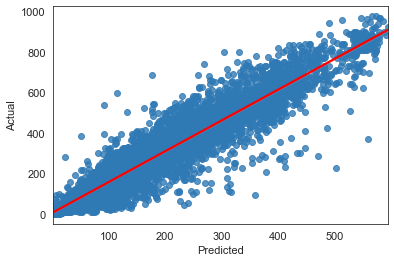

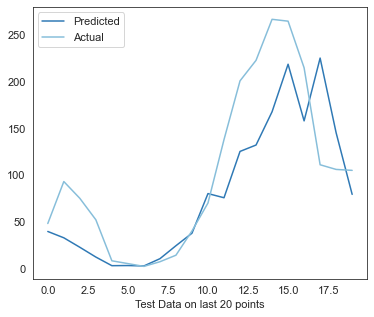

-------------------------
                8645       8646      8647       8648      8649
y_actual   48.000000  93.000000  75.00000  52.000000  8.000000
y_predict  39.459821  32.670236  22.50845  12.021438  2.775078
error       8.540179  60.329764  52.49155  39.978562  5.224922
-------------------------


In [ ]:
# graph --> best fit line on test data
sns.regplot(x=cnt_multitarget_sum_pred, y=y_test_new, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

'''Evaluation metrics on test data'''
test_MAE = round(mean_absolute_error(y_test_new, cnt_multitarget_sum_pred),3)
print(f'test MAE : {test_MAE}')
print('-'*15)

# graph --> actual vs predicted on test data
plt.figure(figsize=(6,5))
plt.plot((cnt_multitarget_sum_pred)[:20])
plt.plot(np.array((y_test_new)[:20]))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data on last 20 points')
plt.show()
print('-'*25)

'''actual vs predicted value on test data'''
d = {'y_actual':y_test_new, 'y_predict':cnt_multitarget_sum_pred, 'error':y_test_new-cnt_multitarget_sum_pred}
print(pd.DataFrame(data=d).head().T)
print('-'*25)

The MAE was obtained, which is slightly worse than the value in the previous task. This could be due to a few reasons. One reason is that the "casual" and "registered" targets may have different underlying patterns and trends, and combining them into a single target may result in a loss of information or patterns that were specific to each target.
Another reason is that the "casual" and "registered" targets may be correlated with each other, and combining them into a single target may result in an increase in noise or variability that was specific to each target.